In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL1BhdHRvblAvc291cmNlL3JlcG9zL3B5c2V0ZXIvZG9jcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/importlib/_bootstrap.py": 1770675260.8448675, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/importlib/_bootstrap_external.py": 1770675260.838247, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/zipimport.py": 1770675257.8128018, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/codecs.py": 1770675256.9875991, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/aliases.py": 1770675258.8441224, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/__init__.py": 1770675258.8321297, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/encodings/utf_8.py": 1770675259.7964222, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/abc.py": 1770675256.843492, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/stat.py": 1770675257.5834544, "/Users/PattonP/miniforge3/envs/pyseter_env/lib/python3.14/_collections_abc.py": 1770675256.7197728, "/Users/Patton

In [2]:
from pyseter.sort import load_features
from pyseter.identify import predict_ids
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def where(list, value):
    """Where in the list is the """
    try:
        return (list.index(value) + 1)
    except ValueError:
        return np.nan

# load in the feature vectors
data_dir = '/Users/PattonP/datasets/happywhale/'
feature_dir = data_dir + '/features'

reference_path = feature_dir + '/train_features.npy'
reference_files, reference_features = load_features(reference_path)

query_path = feature_dir + '/test_features.npy'
query_files, query_features = load_features(query_path)

# get the IDs for every individual in the happywhale set
data_url = (
    'https://raw.githubusercontent.com/philpatton/pyseter/main/' 
    'data/happywhale-ids.csv'
)
id_df = pd.read_csv(data_url)

id_df = id_df.set_index('image')
id_df.head(5)

,species,individual_id
image,,
000110707af0ba.jpg,gray_whale,fbe2b15b5481
00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
000562241d384d.jpg,humpback_whale,1a71fbb72250
0006287ec424cb.jpg,false_killer_whale,1424c7fec826
0007c33415ce37.jpg,false_killer_whale,60008f293a2b


In [3]:
#| code-fold: true
# excel on mac corrupts the IDs (no need to do this on PC or linux)
id_df['individual_id'] = id_df['individual_id'].apply(
    lambda x: str(int(float(x))) if 'E+' in str(x) else x
)

In [4]:
from pyseter.identify import find_neighbors, insert_new_id, pool_predictions
import numpy as np

# this is the true id of every id in the reference dataset
ids = id_df.loc[reference_files, 'individual_id'].to_numpy()

# takes about 19 seconds
distance_matrix, index_matrix = find_neighbors(reference_features, query_features)

# get the corresponding labels for each reference image
predicted_ids = ids[index_matrix]

# insert the prediction "new_individual" at the threshold
distances, ids = insert_new_id(distance_matrix, predicted_ids, threshold=0.5)

# remove redundant predictions and take the minimum distance 
pooled_distances, pooled_ids = pool_predictions(ids, distances)

In [5]:
records = []
for i, image in enumerate(query_files):

    # where is the true id in the list of predicted IDs?
    true_id = id_df.loc[image]['individual_id']
    rank = where(pooled_ids[i].tolist(), true_id)

    # these will become the rows in our dataframe
    records.append({'image': image, 'rank': rank})

df = pd.DataFrame.from_records(records).set_index('image').join(id_df)
df.head()

,rank,species,individual_id
image,,,
a704da09e32dc3.jpg,5.0,frasiers_dolphin,43dad7ffa3c7
de1569496d42f4.jpg,1.0,pilot_whale,ed237f7c2165
4ab51dd663dd29.jpg,1.0,beluga,b9b24be2d5ae
da27c3f9f96504.jpg,1.0,bottlenose_dolpin,c02b7ad6faa0
0df089463bfd6b.jpg,3.0,dusky_dolphin,new_individual


In [6]:
df_list = []

# how many of the proposed ids did you check?
for proposed_id_count in range(1, 26):

    # was the true id further down the list?
    # i.e., had you kept looking would you have found it?
    missed_match = df['rank'] > proposed_id_count

    # is this individual in the reference set? we're assuming no false positives
    not_new = df['individual_id'] != 'new_individual'

    # if both are true, then you committed a false negative error
    df['error'] = missed_match & not_new

    # compute the average for each species 
    fn_df = df.groupby('species')['error'].mean().rename('fn_rate').reset_index()
    fn_df['proposed_id_count'] = proposed_id_count
    
    df_list.append(fn_df)

In [7]:
fn_df = pd.concat(df_list)
fn_df['rbias'] = fn_df['fn_rate'] * 2.56
fn_df = fn_df.loc[fn_df['species'] != 'frasiers_dolphin'].reset_index()

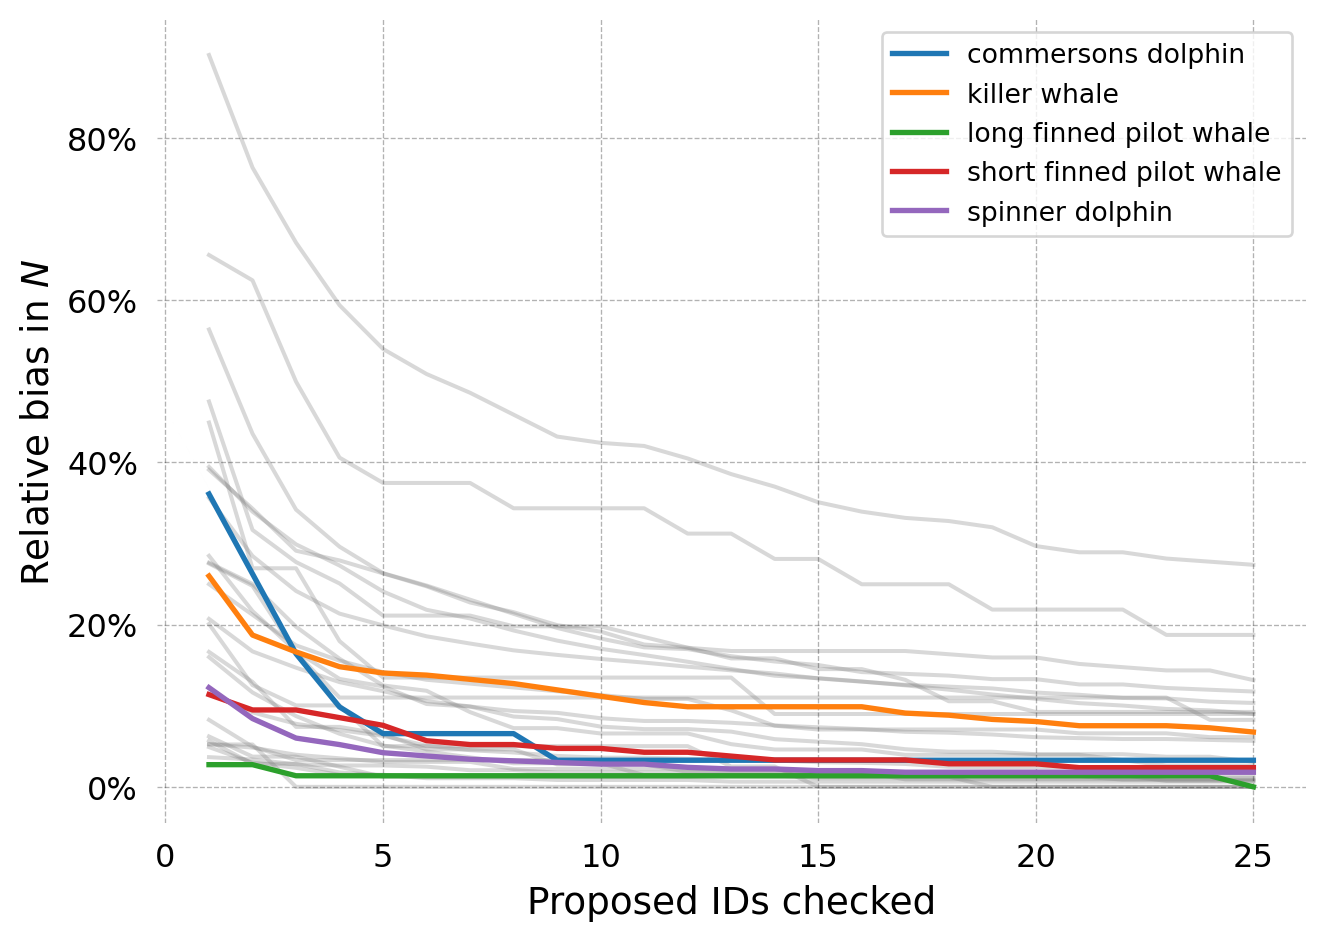

In [8]:
#| code-fold: true
#| 
specials = fn_df.sample(5, random_state=10).species.unique()
special_df = fn_df.loc[fn_df.species.isin(specials)]
nonspecial_df = fn_df.loc[~fn_df.species.isin(specials)]

fig, ax = plt.subplots(figsize = (7, 5), tight_layout=True)

for name, df in nonspecial_df.groupby('species'):
    ax.plot(df.proposed_id_count, df.rbias, alpha=0.3, c='tab:grey', zorder=-2)

for name, df in special_df.groupby('species'):
    ax.plot(df.proposed_id_count, df.rbias, label=name.replace('_', ' '), linewidth=2)

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

ax.set_ylabel(r'Relative bias in $N$', fontsize=14)
ax.set_xlabel(r'Proposed IDs checked', fontsize=14)

ax.spines[:].set_visible(False)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.grid(True, 'major', 'both', ls='--', lw=.5, c='k', alpha=.3)

ax.tick_params(axis='both', which='both', labelsize='large',
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

ax.legend()